# New Wasserstein Metric Function

In [1]:
using PyPlot
using LinearAlgebra
# using Interpolations

In [2]:
Nt = 201;
dt = 1/200;
t = range(0, length=Nt, step=dt);

In [3]:
function gauss_func(t, b, c)
    y = exp.(-(t.-b).^2 ./ (2*c^2));
    return y./maximum(y)
end

function sin_func(t, omega, phi)
    return sin.(2*pi*omega*(t .- phi));
end

function ricker_func(t, t0, sigma)
    t = t.-t0;
    f = (1 .- t.^2 ./ sigma.^2) .* exp.(- t.^2 ./ (2 .* sigma.^2));
    return f
end

ricker_func (generic function with 1 method)

In [4]:
f = gauss_func(t, 1.5, 0.1);
g = gauss_func(t, 1, 0.1);
f = f ./ norm(f,1);
g = g ./ norm(g,1);

In [5]:
function w2_metric(f,g,t,Nt,dt)
    F = zeros(Nt);
    G = zeros(Nt);
    for i = 1:Nt
        F[i] = sum(f[1:i])
        G[i] = sum(g[1:i])
    end
    w2 = 0;
    for ind = 1:Nt
        ind_g = findall(x -> x >= F[ind], G)
        if length(ind_g) == 0
            w2 += (t[end] - t[ind])^2 * f[ind]
        else
            w2 += (t[ind_g[1]] - t[ind])^2 * f[ind]
        end
    end
    return w2
end

w2_metric (generic function with 1 method)

In [6]:
w2_metric(f,g,t,Nt,dt)

0.004652990377240583

## Gaussian

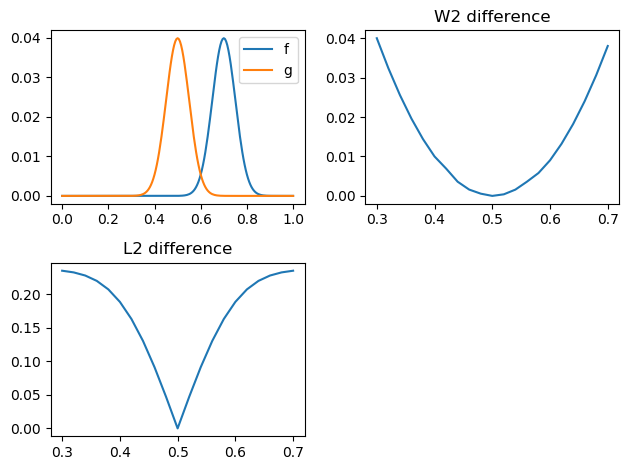

In [7]:
g = gauss_func(t, 0.5, 0.05);
g = g ./ norm(g,1);

misfit = 0.3:0.02:0.7
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = gauss_func(t, misfit[i], 0.05)
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()


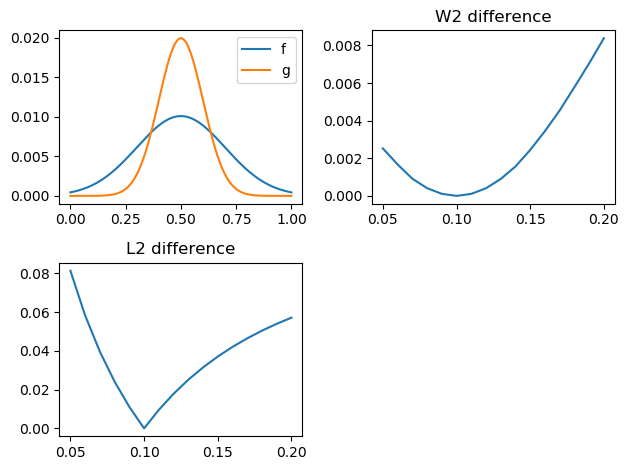

In [8]:
g = gauss_func(t, 0.5, 0.1);
g = g ./ norm(g,1);

misfit = 0.05:0.01:0.2
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = gauss_func(t, 0.5, misfit[i])
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()



## Sine

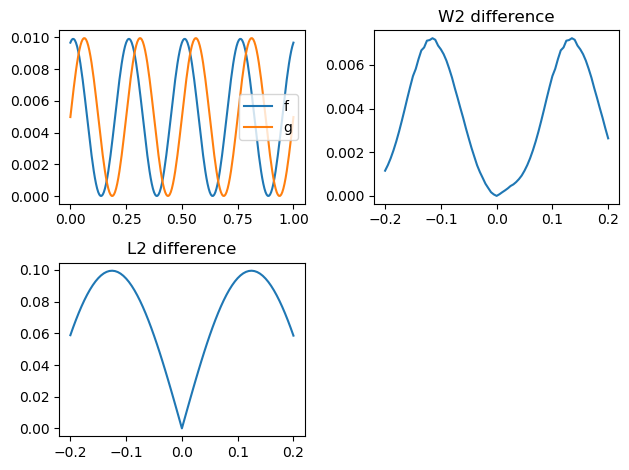

In [9]:
g = sin_func(t, 4, 0);
g = g .+ 1;
g = g ./ norm(g,1);

misfit = -0.2:0.005:0.2
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = sin_func(t, 4, misfit[i]);
    f = f .+ 1;
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

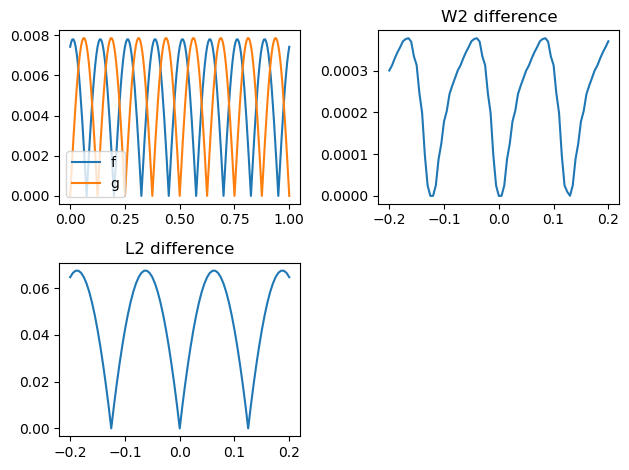

In [10]:
g = sin_func(t, 4, 0);
g = abs.(g);
g = g ./ norm(g,1);

misfit = -0.2:0.005:0.2
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = sin_func(t, 4, misfit[i]);
    f = abs.(f)
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

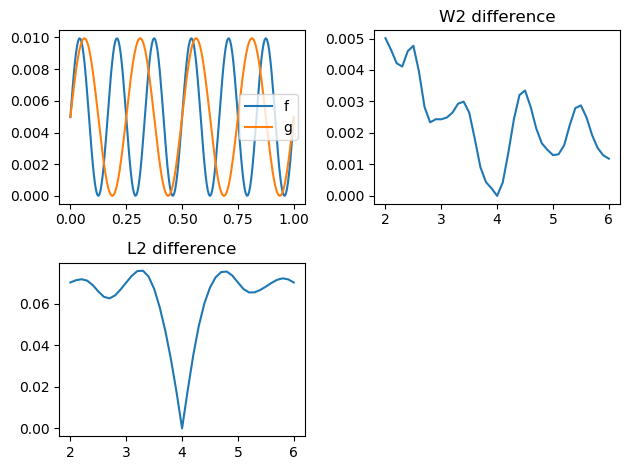

In [11]:
g = sin_func(t, 4, 0);
g = g .+ 1;
g = g ./ norm(g,1);

misfit = 2:0.1:6
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = sin_func(t, misfit[i], 0);
    f = f .+ 1;
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

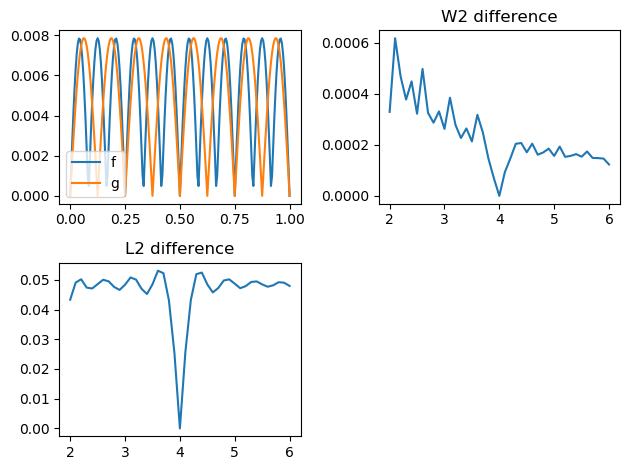

In [12]:
g = sin_func(t, 4, 0);
g = abs.(g)
g = g ./ norm(g,1);

misfit = 2:0.1:6
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = sin_func(t, misfit[i], 0);
    f = abs.(f)
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

## Ricker

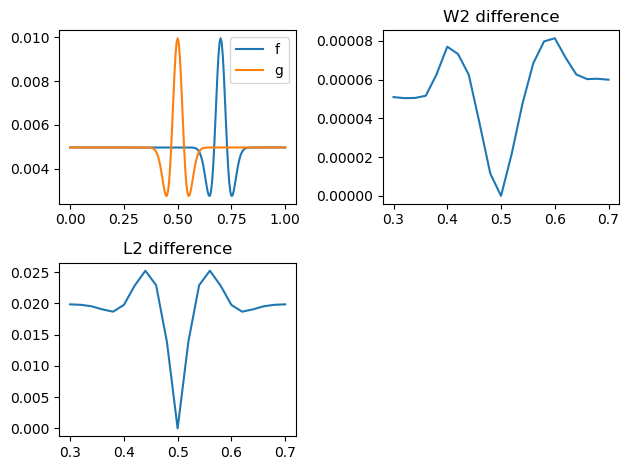

In [13]:
g = ricker_func(t, 0.5, 0.03);
g = g .+ 1;
g = g ./ norm(g,1);

misfit = 0.3:0.02:0.7
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = ricker_func(t, misfit[i], 0.03);
    f = f .+ 1
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

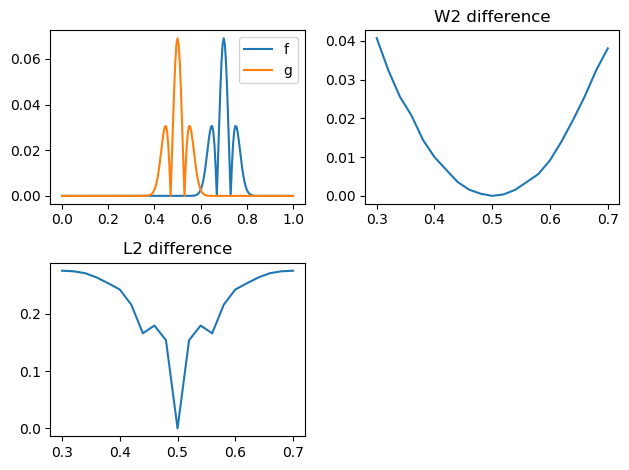

In [14]:
g = ricker_func(t, 0.5, 0.03);
g = abs.(g)
g = g ./ norm(g,1);

misfit = 0.3:0.02:0.7
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = ricker_func(t, misfit[i], 0.03);
    f = abs.(f)
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

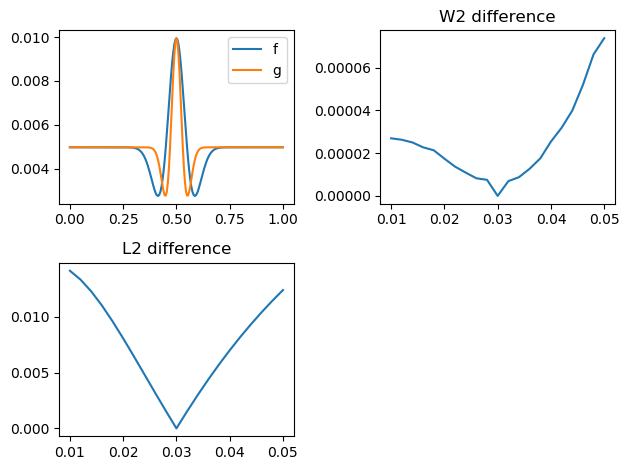

In [15]:
g = ricker_func(t, 0.5, 0.03);
g = g .+ 1;
g = g ./ norm(g,1);

misfit = 0.01:0.002:0.05
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = ricker_func(t, 0.5, misfit[i]);
    f = f .+ 1
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()

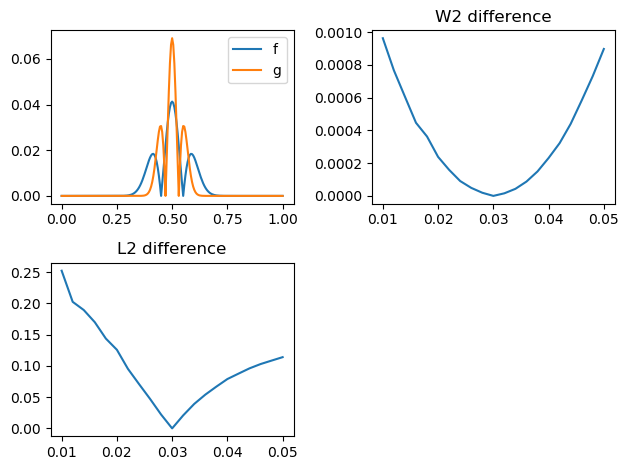

In [16]:
g = ricker_func(t, 0.5, 0.03);
g = abs.(g)
g = g ./ norm(g,1);

misfit = 0.01:0.002:0.05
w2_diff = zeros(length(misfit))
l2_diff = zeros(length(misfit))
for i = 1:length(misfit)
    f = ricker_func(t, 0.5, misfit[i]);
    f = abs.(f)
    f = f ./ norm(f,1)
    w2_diff[i] = w2_metric(f,g,t,Nt,dt)
    l2_diff[i] = norm(f-g,2)
end

subplot(221); plot(t,f,t,g); legend(("f", "g"));
subplot(222); plot(misfit, w2_diff); title("W2 difference")
subplot(223); plot(misfit, l2_diff); title("L2 difference")
tight_layout()